In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=039c3d91ae0c0d705857dc18e29d54fc427b21a3b235b1525d0c0136f667f6fe
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 27.2 MB/s eta 0:00:00


In [ ]:
from qiskit import *
from qiskit_aer import Aer
from qiskit.providers.basic_provider import BasicProvider
import math

In [ ]:
import numpy as np
import random
import re

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

In [ ]:
qr = QuantumRegister(2, name="qr")
cr = ClassicalRegister(4, name="cr")


In [ ]:
singlet = QuantumCircuit(qr, cr, name='singlet')
singlet.h(qr[0])
singlet.cx(qr[0], qr[1])

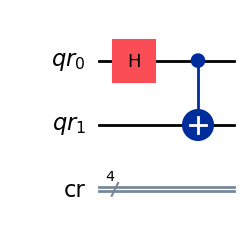

In [ ]:
singlet.draw(output = 'mpl')

In [ ]:
measureA1 = QuantumCircuit(qr, cr, name='measureA1')
measureA1.h(qr[0])
measureA1.measure(qr[0], cr[0])

measureA2 = QuantumCircuit(qr, cr, name='measureA2')
measureA2.s(qr[0])
measureA2.h(qr[0])
measureA2.t(qr[0])
measureA2.h(qr[0])
measureA2.measure(qr[0], cr[0])

measureA3 = QuantumCircuit(qr, cr, name='measureA3')
measureA3.measure(qr[0],cr[0])

measureB1 = QuantumCircuit(qr, cr, name='measureB1')
measureB1.s(qr[1])
measureB1.h(qr[1])
measureB1.t(qr[1])
measureB1.h(qr[1])
measureB1.measure(qr[1], cr[1])

measureB2 = QuantumCircuit(qr, cr, name='measureB2')
measureB2.measure(qr[1], cr[1])

measureB3 = QuantumCircuit(qr, cr, name='measureB3')
measureB3.s(qr[1])
measureB3.h(qr[1])
measureB3.tdg(qr[1])
measureB3.h(qr[1])
measureB3.measure(qr[1], cr[1])

aliceMeasurements = [measureA1, measureA2, measureA3]
bobMeasurements = [measureB1, measureB2, measureB3]




In [ ]:
numberOfSinglets = 5000

In [ ]:
aliceMeasurementChoices = [random.randint(1,3) for i in range(numberOfSinglets)]
bobMeasurementChoices = [random.randint(1,3) for i in range(numberOfSinglets)]

In [ ]:
print(aliceMeasurementChoices)


[3, 2, 3, 2, 3, 1, 3, 1, 1, 1, 2, 3, 3, 3, 2, 1, 2, 2, 1, 3, 1, 2, 2, 3, 1, 2, 2, 1, 1, 3, 3, 1, 1, 2, 3, 2, 2, 1, 3, 1, 1, 1, 3, 3, 1, 1, 3, 2, 1, 1, 2, 2, 1, 3, 3, 2, 3, 1, 3, 2, 2, 2, 2, 2, 3, 2, 1, 3, 1, 3, 3, 1, 2, 3, 1, 3, 2, 3, 3, 3, 1, 2, 2, 1, 3, 2, 1, 2, 3, 2, 2, 2, 2, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 3, 2, 3, 2, 3, 1, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 3, 1, 2, 3, 1, 1, 2, 1, 2, 3, 2, 2, 1, 3, 3, 1, 2, 3, 3, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 3, 1, 3, 3, 1, 1, 2, 3, 2, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 2, 1, 1, 3, 2, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 2, 2, 2, 1, 3, 2, 3, 1, 1, 1, 3, 3, 1, 3, 2, 1, 1, 1, 1, 3, 3, 2, 1, 2, 3, 3, 1, 3, 2, 3, 1, 2, 2, 1, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3, 1, 2, 2, 3, 1, 3, 1, 1, 2, 1, 3, 1, 1, 2, 3, 3, 3, 3, 2, 1, 3, 1, 1, 1, 2, 1, 3, 2, 2, 2, 3, 1, 2, 1, 3, 1, 2, 3, 1, 3, 1, 1, 1, 2, 2, 2, 1, 1, 3, 2, 1, 3, 3, 3, 2, 3, 3, 1, 1, 1, 3, 3, 1, 2, 3, 3, 1, 1, 1, 2, 3, 1, 2, 3, 3, 3, 3, 3, 3, 1, 2, 1, 1, 1, 3, 1, 3, 3, 3, 2, 3, 3, 2, 2, 2, 

In [ ]:
print(bobMeasurementChoices)

[1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 3, 3, 3, 3, 2, 1, 3, 1, 1, 2, 1, 3, 1, 1, 2, 2, 1, 2, 2, 3, 1, 2, 1, 2, 1, 2, 3, 3, 3, 2, 1, 3, 2, 1, 1, 3, 2, 3, 3, 3, 3, 3, 2, 2, 1, 3, 1, 1, 3, 2, 3, 2, 1, 1, 3, 3, 3, 1, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 1, 1, 2, 1, 1, 3, 1, 3, 2, 2, 1, 2, 3, 3, 3, 3, 1, 2, 2, 3, 1, 1, 1, 3, 2, 3, 3, 3, 2, 3, 2, 1, 3, 2, 1, 2, 3, 1, 2, 1, 3, 3, 1, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 1, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 3, 1, 1, 1, 2, 3, 2, 3, 1, 3, 1, 1, 2, 3, 3, 2, 3, 2, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 3, 3, 1, 2, 3, 1, 1, 1, 3, 2, 3, 2, 3, 1, 2, 2, 3, 3, 3, 1, 1, 2, 1, 3, 2, 2, 2, 2, 3, 2, 3, 1, 3, 2, 2, 3, 3, 1, 1, 3, 2, 2, 3, 3, 3, 3, 3, 1, 2, 1, 2, 3, 2, 2, 3, 3, 1, 1, 1, 2, 2, 2, 1, 1, 3, 2, 1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 2, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 3, 1, 1, 2, 2, 3, 3, 1, 3, 3, 1, 3, 3, 1, 2, 3, 3, 1, 2, 3, 1, 2, 2, 2, 3, 3, 2, 2, 1, 1, 1, 3, 2, 2, 3, 1, 1, 1, 1, 3, 1, 3, 3, 1, 2, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 3, 2, 1, 2, 

In [ ]:
circuits = []

for i in range(numberOfSinglets):
     circuitName = singlet & aliceMeasurements[aliceMeasurementChoices[i]-1] & bobMeasurements[bobMeasurementChoices[i]-1]
     circuits.append(circuitName)

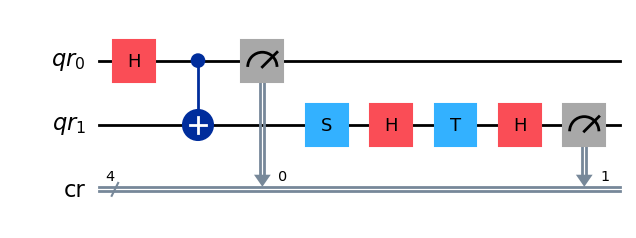

In [ ]:
circuits[0].draw(output = 'mpl')

In [ ]:
results = []
for i in range(numberOfSinglets):
  simulator = Aer.get_backend('qasm_simulator')
  backend = BasicProvider().get_backend('basic_simulator')
  transpiled_circuit = transpile(circuits[i], backend)

  result = backend.run(transpiled_circuit, shots=1).result()
  results.append(result)

In [ ]:
abPatterns = [
    re.compile('..00$'),
    re.compile('..01$'),
    re.compile('..10$'),
    re.compile('..11$')
]

In [ ]:
aliceResults = []
bobResults = []

for i in range(numberOfSinglets):

  res = str(list(results[i].get_counts().keys())[0])
  if abPatterns[0].search(res):
     aliceResults.append(0)
     bobResults.append(0)
  if abPatterns[1].search(res):
     aliceResults.append(1)
     bobResults.append(0)
  if abPatterns[2].search(res):
     aliceResults.append(0)
     bobResults.append(1)
  if abPatterns[3].search(res):
     aliceResults.append(1)
     bobResults.append(1)

In [ ]:
print(aliceResults)

[1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 

In [ ]:
print(bobResults)

[1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 

In [ ]:
aliceKey = []
bobKey = []

for i in range(numberOfSinglets):
    if (aliceMeasurementChoices[i] == 2 and bobMeasurementChoices[i]  == 1) or (aliceMeasurementChoices[i] == 3 and bobMeasurementChoices[i] == 2):
       aliceKey.append(aliceResults[i])
       bobKey.append(bobResults[i])
keyLength = len(aliceKey)
print("key length:",keyLength)


key length: 1070


In [ ]:
abKeyMismatches = 0

for j in range(keyLength):
    if aliceKey[j] != bobKey[j]:
        abKeyMismatches += 1

print("key mismatches:",abKeyMismatches)

key mismatches: 0


In [ ]:
print(aliceKey)

[1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 

In [ ]:
print(bobKey)

[1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 

In [ ]:
def chsh_corr(result):

    # lists with the counts of measurement results
    # each element represents the number of (0,0), (0,1), (1,0) and (1,1) results respectively
    countA1B1 = [0, 0, 0, 0] # XW observable
    countA1B3 = [0, 0, 0, 0] # XV observable
    countA3B1 = [0, 0, 0, 0] # ZW observable
    countA3B3 = [0, 0, 0, 0] # ZV observable

    for i in range(numberOfSinglets):

        res = list(results[i].get_counts().keys())[0]

        # if the spins of the qubits of the i-th singlet were projected onto the a_1/b_1 directions
        if (aliceMeasurementChoices[i] == 1 and bobMeasurementChoices[i] == 1):
            for j in range(4):
                if abPatterns[j].search(res):
                    countA1B1[j] += 1

        if (aliceMeasurementChoices[i] == 1 and bobMeasurementChoices[i] == 3):
            for j in range(4):
                if abPatterns[j].search(res):
                    countA1B3[j] += 1

        if (aliceMeasurementChoices[i] == 3 and bobMeasurementChoices[i] == 1):
            for j in range(4):
                if abPatterns[j].search(res):
                    countA3B1[j] += 1

        # if the spins of the qubits of the i-th singlet were projected onto the a_3/b_3 directions
        if (aliceMeasurementChoices[i] == 3 and bobMeasurementChoices[i] == 3):
            for j in range(4):
                if abPatterns[j].search(res):
                    countA3B3[j] += 1

    # number of the results obtained from the measurements in a particular basis
    total11 = sum(countA1B1)
    total13 = sum(countA1B3)
    total31 = sum(countA3B1)
    total33 = sum(countA3B3)

    # expectation values of XW, XV, ZW and ZV observables (2)
    expect11 = (countA1B1[0] - countA1B1[1] - countA1B1[2] + countA1B1[3])/total11 # -1/sqrt(2)
    expect13 = (countA1B3[0] - countA1B3[1] - countA1B3[2] + countA1B3[3])/total13 # 1/sqrt(2)
    expect31 = (countA3B1[0] - countA3B1[1] - countA3B1[2] + countA3B1[3])/total31 # -1/sqrt(2)
    expect33 = (countA3B3[0] - countA3B3[1] - countA3B3[2] + countA3B3[3])/total33 # -1/sqrt(2)

    corr = expect11 - expect13 + expect31 + expect33 # calculate the CHSH correlation value (3)

    return corr

In [ ]:
corr = chsh_corr(results) # CHSH correlation value

# CHSH inequality test
print('CHSH correlation value: ' + str(round(corr, 3)))

# Keys
print('Length of the key: ' + str(keyLength))
print('Number of mismatching bits: ' + str(abKeyMismatches) + '\n')

CHSH correlation value: 2.855
Length of the key: 1070
Number of mismatching bits: 0



In [ ]:
key = aliceKey

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
import numpy as np
from PIL import Image
#import cv2  # You can use any image processing library to read/write images

def binary_to_decimal(binary_list): # Changed function parameter name to reflect the input type
    """
    Convert a binary list to a decimal value.
    """
    binary_string = ''.join(str(bit) for bit in binary_list) # Convert list of bits to a binary string
    return int(binary_string, 2)

def generate_initial_conditions(binary_key):
    """
    Generate initial conditions for the Lorenz system from a binary key.
    """
    # Split the binary key into three parts for x, y, z
    part_length = len(binary_key) // 3
    x_bin = binary_key[:part_length]
    y_bin = binary_key[part_length:2 * part_length]
    z_bin = binary_key[2 * part_length:]

    # Convert binary parts to decimal
    x = binary_to_decimal(x_bin) / (2 ** len(x_bin))
    y = binary_to_decimal(y_bin) / (2 ** len(y_bin))
    z = binary_to_decimal(z_bin) / (2 ** len(z_bin))

    return x, y, z

# ... (rest of the code remains the same)
def lorenz_system(x, y, z, sigma=10.0, rho=28.0, beta=8.0/3.0):
    """
    Compute the derivatives of the Lorenz system.
    """
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return dx_dt, dy_dt, dz_dt

def generate_lorenz_key_stream(x, y, z, length, sigma=10.0, rho=28.0, beta=8.0/3.0, dt=0.01):
    """
    Generate a key stream using the Lorenz system.
    """
    key_stream = []
    for _ in range(length):
        dx_dt, dy_dt, dz_dt = lorenz_system(x, y, z, sigma, rho, beta)
        x += dx_dt * dt
        y += dy_dt * dt
        z += dz_dt * dt
        key_stream.append(int(abs(x * 256)) % 256)  # Use the x-coordinate for the key stream
    return key_stream

def encrypt_decrypt_image(image, key_stream):
    """
    Encrypt or decrypt an image using the key stream.
    """
    encrypted_image = np.copy(image)
    height, width = encrypted_image.shape[:2]
    i = 0
    for x in range(height):
        for y in range(width):
            encrypted_image[x, y] = encrypted_image[x, y] ^ key_stream[i % len(key_stream)]
            i += 1
    return encrypted_image

# Example usage
binary_key = key  # Example binary key
x, y, z = generate_initial_conditions(binary_key)



# Read an example image (replace with your image file path)
image_path = '/content/image(copy).jpg'
image = Image.open(image_path).convert('L')  # Convert image to grayscale
image_array = np.array(image)


# Generate the key stream using the Lorenz system
key_stream_length = keyLength  # Length of the key stream (adjust based on your image size)
key_stream = generate_lorenz_key_stream(x, y, z, key_stream_length)

# Encrypt the image
encrypted_image = encrypt_decrypt_image(image, key_stream)
encrypted_image = Image.fromarray(encrypted_image)
encrypted_image.save('encrypted_image.png')




# Decrypt the image (using the same key stream)
decrypted_image = encrypt_decrypt_image(encrypted_image, key_stream)
decrypted_image = Image.fromarray(decrypted_image)
decrypted_image.save('decrypted_image.png')



# Verify the encryption and decryption process
assert np.array_equal(image, decrypted_image)


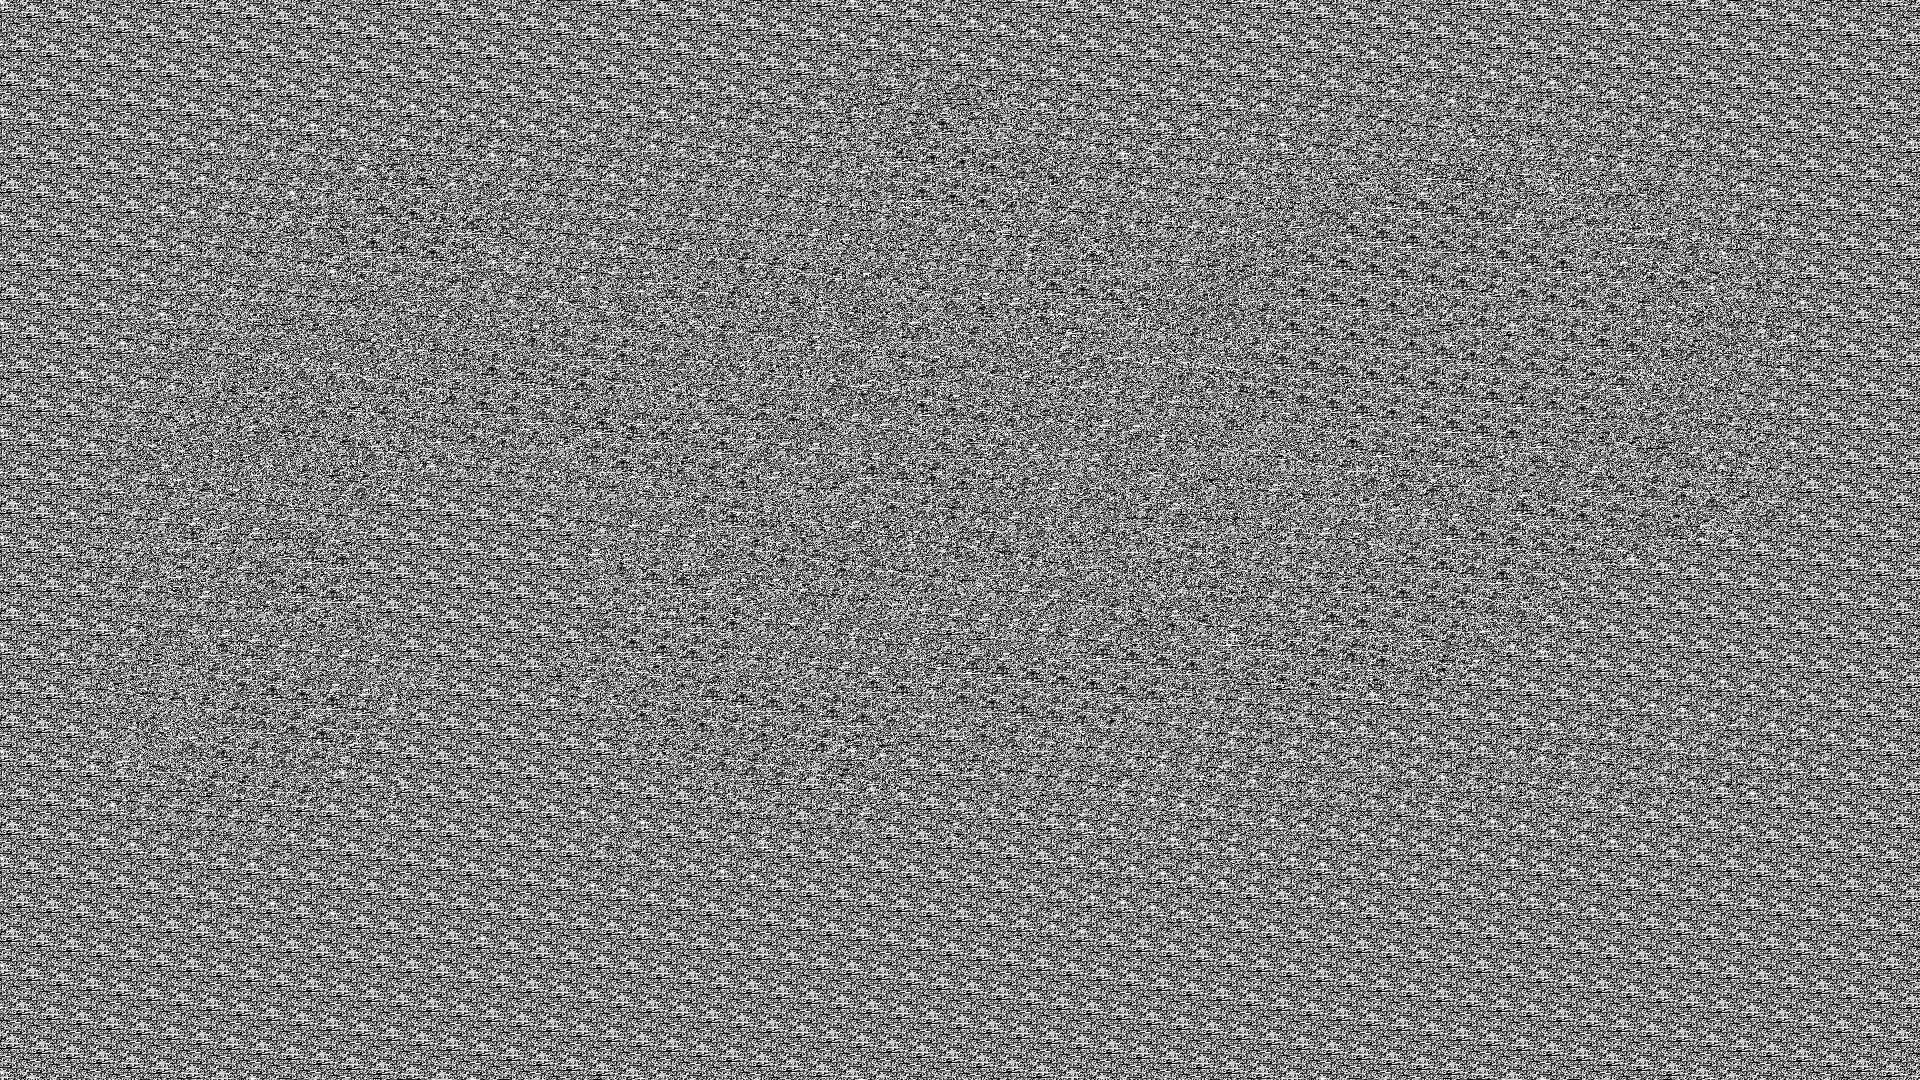

In [ ]:
encrypted_image

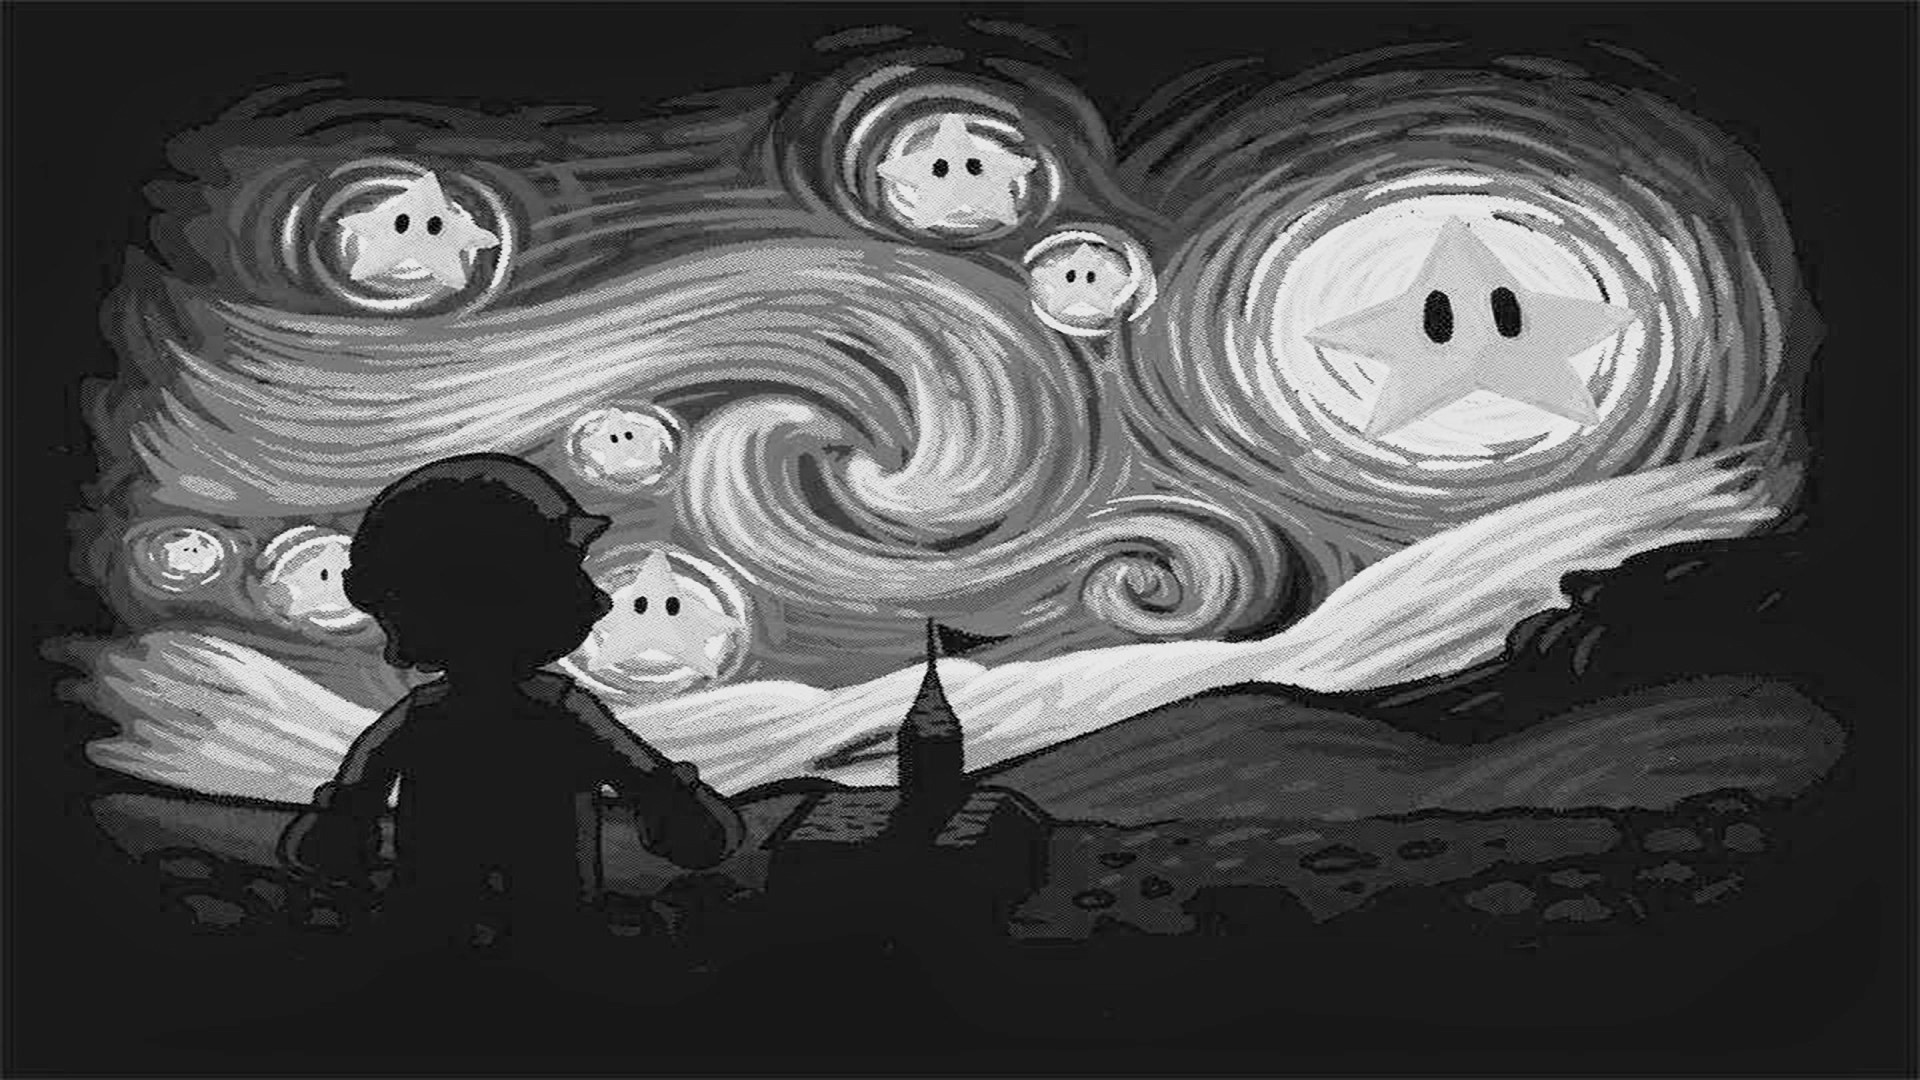

In [ ]:
decrypted_image